In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

In [2]:
(training_data, training_targets), (testing_data,
testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets),axis=0)

In [3]:
print("Categories:", np.unique(targets))
print("Number of unique words:",
len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [5]:
print("Label:", targets[0])
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [37]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence[:10000]] = 1
    return results

vec_data = vectorize(data)
targets = np.array(targets).astype("float32")

In [8]:
test_x = vec_data[:10000]
test_y = targets[:10000]
train_x = vec_data[10000:]
train_y = targets[10000:]

In [9]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

c:\Users\Артём\Desktop\лекции\DIIS\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

h = model.fit(
    train_x, train_y,
    epochs= 2,
    batch_size = 128,
    validation_data = (test_x, test_y)
)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7997 - loss: 0.4216 - val_accuracy: 0.8925 - val_loss: 0.2591
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9286 - loss: 0.1903 - val_accuracy: 0.8872 - val_loss: 0.2849


In [11]:
from collections import Counter

c = Counter([element for sublist in data for element in sublist])
mc = {pair[0]: i for i, pair in enumerate(c.most_common(int(0.7 * len(c))))}

In [12]:
len(data), len(c), len(mc)

(50000, 9998, 6998)

In [13]:
max(len(d) for d in data)

2494

(array([3.5259e+04, 1.0799e+04, 2.7610e+03, 1.0160e+03, 1.4500e+02,
        8.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   7. ,  255.7,  504.4,  753.1, 1001.8, 1250.5, 1499.2, 1747.9,
        1996.6, 2245.3, 2494. ]),
 <BarContainer object of 10 artists>)

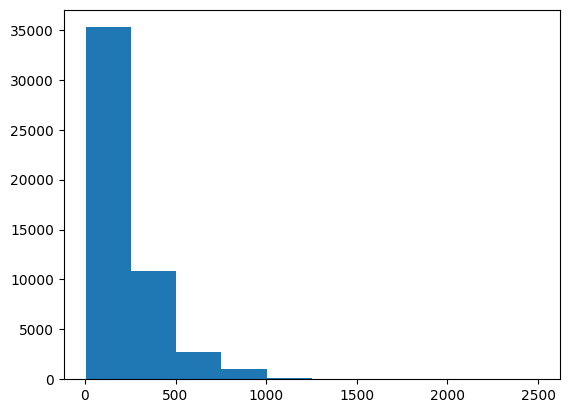

In [14]:
plt.hist([len(d) for d in data])

In [15]:
def new_vectorize(sequences, dim, mc):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        for word in sequence:
            if word in mc:
                results[i, mc[word]] = 1
    return results

In [20]:
new_vec = new_vectorize(data, len(mc), mc)

test_x = new_vec[:10000]
test_y = targets[:10000]
train_x = new_vec[10000:]
train_y = targets[10000:]

In [21]:
model2 = models.Sequential()
# Input - Layer
model2.add(layers.Dense(50, activation = "relu", input_shape=(new_vec.shape[1], )))
# Hidden - Layers
model2.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model2.add(layers.Dense(50, activation = "relu"))
model2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model2.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model2.add(layers.Dense(1, activation = "sigmoid"))

model2.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

h2 = model2.fit(
    train_x, train_y,
    epochs= 2,
    batch_size = 128,
    validation_data = (test_x, test_y)
)

c:\Users\Артём\Desktop\лекции\DIIS\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7759 - loss: 0.4488 - val_accuracy: 0.8938 - val_loss: 0.2637
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9242 - loss: 0.2043 - val_accuracy: 0.8915 - val_loss: 0.2777


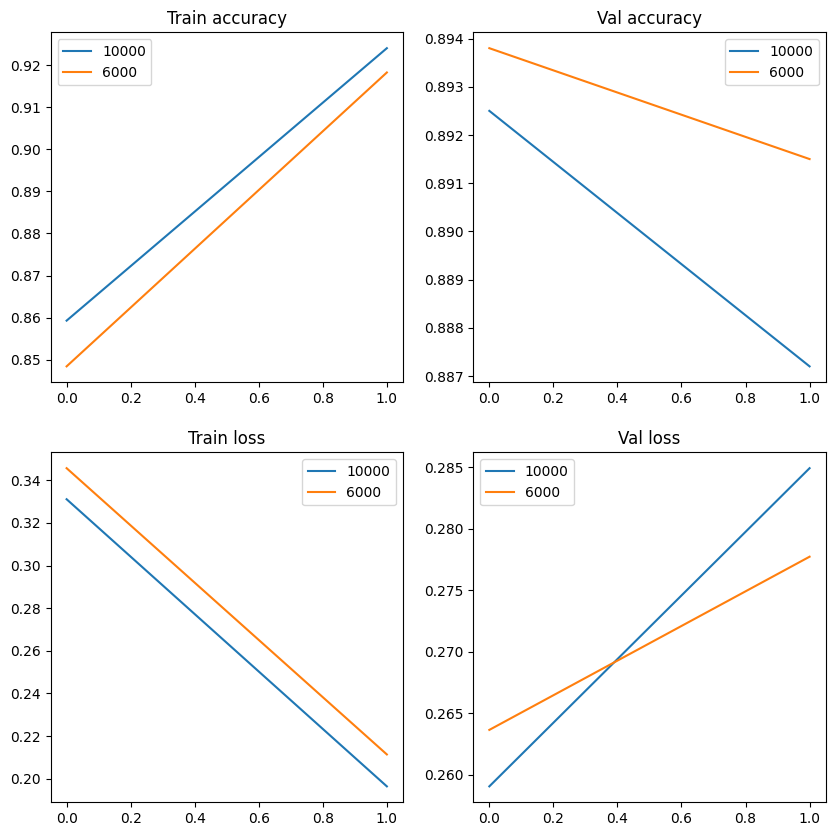

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0, 0].plot(h.history["accuracy"], label=(10_000))
ax[0, 0].plot(h2.history["accuracy"], label=(6_000))
ax[0, 0].set_title("Train accuracy")
ax[0, 0].legend()

ax[0, 1].plot(h.history["val_accuracy"], label=(10_000))
ax[0, 1].plot(h2.history["val_accuracy"], label=(6_000))
ax[0, 1].set_title("Val accuracy")
ax[0, 1].legend()

ax[1, 0].plot(h.history["loss"], label=(10_000))
ax[1, 0].plot(h2.history["loss"], label=(6_000))
ax[1, 0].set_title("Train loss")
ax[1, 0].legend()

ax[1, 1].plot(h.history["val_loss"], label=(10_000))
ax[1, 1].plot(h2.history["val_loss"], label=(6_000))
ax[1, 1].set_title("Val loss")
ax[1, 1].legend()

plt.show()

In [ ]:
def user_input(model, index):
    with open("foo.txt", "r") as file:
        text = file.read()
    encoded = [index.get(c, 0) for c in text.split()]
    vec = new_vectorize([encoded], len(mc), mc)
    return "Positive" if (model.predict(vec, verbose=False) > 0.5)[0, 0] else "Negative"
    
user_input(model2, index)

'Possitive'